In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
# from habitat.utils.visualizations import maps
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os
import cv2
import ast
from tqdm import tqdm

# Load HDF5 File

In [3]:
input_dir = '/media/cds-s/data/Datasets/Habitat/'
# output_path_images = os.path.join(input_dir, 'images')

In [8]:
for map_name in tqdm(os.listdir(os.path.join(input_dir, "HPointLoc"))):
    if map_name.find('.') != -1:
        continue
    num_around = 0
    num_base = 0
    
    for hdf5_dataset in sorted(os.listdir(os.path.join(input_dir, "HPointLoc", map_name))):
        if hdf5_dataset.find('.hdf5') == -1:
            continue
    
        hdf5_dataset_path = os.path.join(input_dir, "HPointLoc", map_name, hdf5_dataset)
        file = h5py.File(hdf5_dataset_path, 'r')
        rgb_base = file['rgb_base']
        depth_base = file['depth_base']
        semantic_base = file['semantic_base']
        compass_base = file['compass_base']
        gps_base = file['gps_base']
        heading_base = file['heading_base']
        quat_base = file['quat_base']
        top_down_map_base = file['top_down_map_base']
        fog_of_war_mask_base = file['fog_of_war_mask_base']
        agent_map_coord_base = file['agent_map_coord_base']
        agent_angle_base = file['agent_angle_base']
        rgb = file['rgb']
        depth = file['depth']
        semantic = file['semantic']
        compass = file['compass']
        gps = file['gps']
        heading = file['heading']
        quat = file['quat']
        top_down_map = file['top_down_map']
        fog_of_war_mask = file['fog_of_war_mask']
        agent_map_coord = file['agent_map_coord']
        agent_angle = file['agent_angle']
        mapping = np.array(file['mapping'])
        index_to_title_map = ast.literal_eval(str(np.array(file['index_to_title_map'])))
    
#         for i in range(len(rgb_base)):
#             filename = hdf5_dataset[:-5]+'_database_'+str(i).zfill(4)+'.png'
#             filename = filename[:filename.rfind('.')]
        
        output_path_images = os.path.join(input_dir, "extracted_HPointLoc", map_name, 'images')#, hdf5_dataset[:-5])
        os.makedirs(output_path_images, exist_ok=True)
        
        for i in range(len(rgb)):
            cv2.imwrite(os.path.join(output_path_images, hdf5_dataset[:-5]+'_query_'+str(i).zfill(4)+'.png'), cv2.cvtColor(rgb[i], cv2.COLOR_RGB2BGR))
        for i in range(len(rgb_base)):
            cv2.imwrite(os.path.join(output_path_images,  hdf5_dataset[:-5]+'_database_'+str(i).zfill(4)+'.png'), cv2.cvtColor(rgb_base[i], cv2.COLOR_RGB2BGR))

100%|██████████| 51/51 [09:45<00:00, 11.47s/it]


## Writing data of 3D points (after hierarchical localization's work)

In [ ]:
# writing data of 3D points (after hierarchical localization's work)
for hdf5_dataset in sorted(os.listdir(os.path.join(input_dir,'hdf5'))):
    hdf5_dataset_path = os.path.join(input_dir, 'hdf5', hdf5_dataset)
    file = h5py.File(hdf5_dataset_path, 'r')
    rgb_base = file['rgb_base']
    depth_base = file['depth_base']
    semantic_base = file['semantic_base']
    compass_base = file['compass_base']
    gps_base = file['gps_base']
    heading_base = file['heading_base']
    quat_base = file['quat_base']
    top_down_map_base = file['top_down_map_base']
    fog_of_war_mask_base = file['fog_of_war_mask_base']
    agent_map_coord_base = file['agent_map_coord_base']
    agent_angle_base = file['agent_angle_base']
    rgb = file['rgb']
    depth = file['depth']
    semantic = file['semantic']
    compass = file['compass']
    gps = file['gps']
    heading = file['heading']
    quat = file['quat']
    top_down_map = file['top_down_map']
    fog_of_war_mask = file['fog_of_war_mask']
    agent_map_coord = file['agent_map_coord']
    agent_angle = file['agent_angle']
    mapping = np.array(file['mapping'])
    index_to_title_map = ast.literal_eval(str(np.array(file['index_to_title_map'])))
    for i in range(len(rgb_base)):
        depth_map = depth_base[i]

# Examples of what inside

In [14]:
print('Base point has {} images'.format(len(rgb_base)))
print('Around points has {} images'.format(len(rgb)))

Base point has 6 images
Around points has 50 images


In [11]:
#For base point number 1
index = 1
print('GPS position {}'.format(gps_base[index]))
print('Compas position {}'.format(compass_base[index]))
print('Quaternion (w,x,y,z) {}'.format(quat_base[index]))

GPS position [ 2.2359405e+00  3.1292439e-06 -2.4944665e+00]
Compas position [1.6260253]
Quaternion (w,x,y,z) [-0.99338692  0.          0.11481483  0.        ]


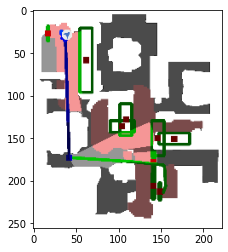

In [12]:
# Environment map for the point
mapp = draw_top_down_map(top_down_map[index],fog_of_war_mask[index],agent_map_coord[index],heading[index][0],rgb[index].shape[0])
plt.imshow(mapp)

In [13]:
# Dictionary of what indices corresponds to objects
index_to_title_map

{40: 'misc',
 2: 'floor',
 17: 'ceiling',
 1: 'wall',
 7: 'cabinet',
 9: 'window',
 4: 'door',
 18: 'toilet',
 20: 'towel',
 6: 'picture',
 21: 'mirror',
 15: 'sink',
 23: 'shower',
 32: 'blinds',
 3: 'chair',
 0: 'void',
 13: 'chest_of_drawers',
 11: 'bed',
 14: 'plant',
 12: 'curtain',
 8: 'cushion',
 28: 'lighting',
 34: 'seating',
 -1: '',
 31: 'shelving',
 39: 'objects',
 38: 'clothes',
 37: 'appliances',
 26: 'counter',
 25: 'bathtub',
 36: 'furniture',
 5: 'table',
 10: 'sofa',
 22: 'tv_monitor',
 16: 'stairs'}

database pose
[-7.741673   -0.35754275  3.9818783 ]
query pose
[-7.9339123  -0.37338424  4.131479  ]


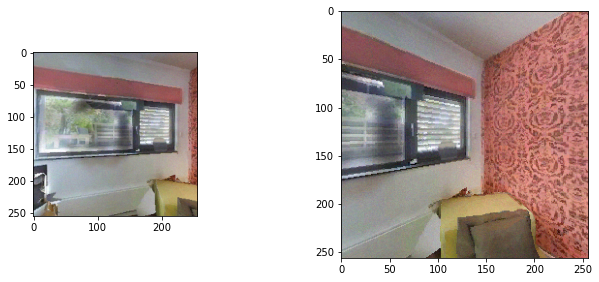

In [12]:
# All 6 images of base point. HFOV=90 degrees. TURN_ANGLE=60 degrees
f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(222)
ax2.imshow(rgb_base[2])
ax1.imshow(rgb[4])
print('database pose')
print(gps_base[2])
print('query pose')
print(gps[4])
# ax3.imshow(rgb_base[2])
# ax4.imshow(rgb_base[3])
# ax5.imshow(rgb_base[4])
# ax6.imshow(rgb_base[5])

query pose
[-2.4589353 -0.3934288  2.0714133]
database pose
[ 1.0405664  0.2065711 -0.8006188]


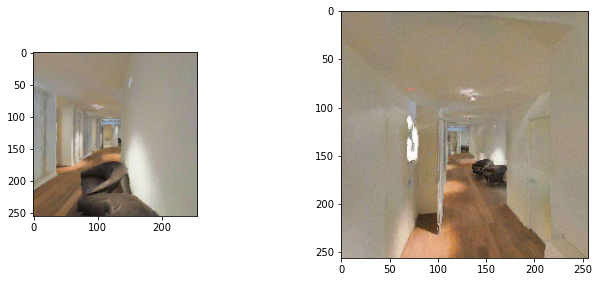

In [15]:
# All 6 images of base point. HFOV=90 degrees. TURN_ANGLE=60 degrees
file1 = h5py.File('/media/cds-s/data/Datasets/Habitat/1LXtFkjw3qL_point0/hdf5/1LXtFkjw3qL_point8.hdf5', 'r')
rgb1 = file1['rgb']
rgb_base1 = file1['rgb_base']
gps1 = file1['gps']
gps_base1 = file1['gps_base']
file2 = h5py.File('/media/cds-s/data/Datasets/Habitat/1LXtFkjw3qL_point0/hdf5/1LXtFkjw3qL_point5.hdf5', 'r')
rgb2 = file2['rgb']
rgb_base2 = file2['rgb_base']
gps2 = file2['gps']
gps_base2 = file2['gps_base']

f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(222)
ax1.imshow(rgb1[7])
ax2.imshow(rgb_base2[4])
print('query pose')
print(gps1[7])
print('database pose')
print(gps_base2[4])
# ax3.imshow(rgb_base[2])
# ax4.imshow(rgb_base[3])
# ax5.imshow(rgb_base[4])
# ax6.imshow(rgb_base[5])

query pose
[-2.4891722 -0.3934288  1.9483134]
database pose
[-2.441019  -0.3934288  2.006259 ]


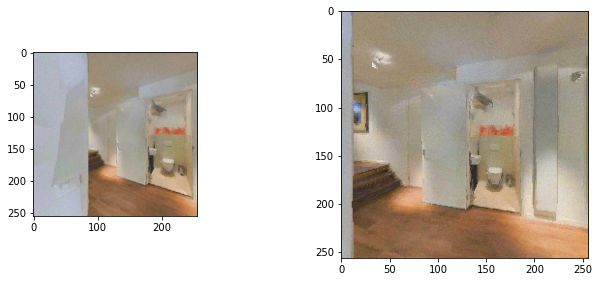

In [22]:
# All 6 images of base point. HFOV=90 degrees. TURN_ANGLE=60 degrees
file1 = h5py.File('/media/cds-s/data/Datasets/Habitat/1LXtFkjw3qL_point0/hdf5/1LXtFkjw3qL_point8.hdf5', 'r')
rgb1 = file1['rgb']
rgb_base1 = file1['rgb_base']
gps1 = file1['gps']
gps_base1 = file1['gps_base']
file2 = h5py.File('/media/cds-s/data/Datasets/Habitat/1LXtFkjw3qL_point0/hdf5/1LXtFkjw3qL_point8.hdf5', 'r')
rgb2 = file2['rgb']
rgb_base2 = file2['rgb_base']
gps2 = file2['gps']
gps_base2 = file2['gps_base']

f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(222)
ax1.imshow(rgb1[21])
ax2.imshow(rgb_base2[1])
print('query pose')
print(gps1[21])
print('database pose')
print(gps_base2[1])
# ax3.imshow(rgb_base[2])
# ax4.imshow(rgb_base[3])
# ax5.imshow(rgb_base[4])
# ax6.imshow(rgb_base[5])

query pose
[-2.695259  -0.3934288  2.0784376]
database pose
[-4.2600875 -0.3934288  1.1750002]


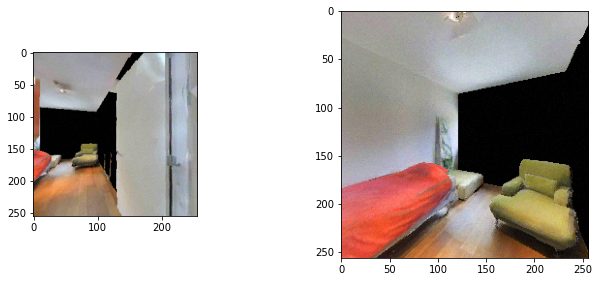

In [21]:
# All 6 images of base point. HFOV=90 degrees. TURN_ANGLE=60 degrees
file1 = h5py.File('/media/cds-s/data/Datasets/Habitat/1LXtFkjw3qL_point0/hdf5/1LXtFkjw3qL_point8.hdf5', 'r')
rgb1 = file1['rgb']
rgb_base1 = file1['rgb_base']
gps1 = file1['gps']
gps_base1 = file1['gps_base']
file2 = h5py.File('/media/cds-s/data/Datasets/Habitat/1LXtFkjw3qL_point0/hdf5/1LXtFkjw3qL_point7.hdf5', 'r')
rgb2 = file2['rgb']
rgb_base2 = file2['rgb_base']
gps2 = file2['gps']
gps_base2 = file2['gps_base']

f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(222)
ax1.imshow(rgb1[12])
ax2.imshow(rgb_base2[5])
print('query pose')
print(gps1[12])
print('database pose')
print(gps_base2[5])
# ax3.imshow(rgb_base[2])
# ax4.imshow(rgb_base[3])
# ax5.imshow(rgb_base[4])
# ax6.imshow(rgb_base[5])

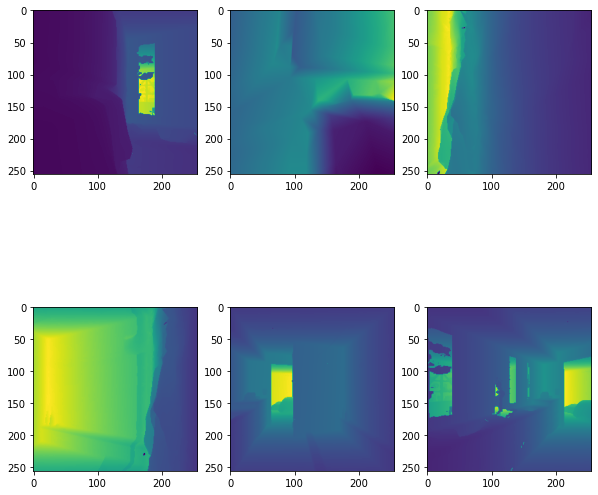

In [18]:
# All 6 depth images of base point. HFOV=90 degrees. TURN_ANGLE=60 degrees
f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 = f.add_subplot(233)
ax4 = f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 = f.add_subplot(236)
ax1.imshow(depth_base[0])
ax2.imshow(depth_base[1])
ax3.imshow(depth_base[2])
ax4.imshow(depth_base[3])
ax5.imshow(depth_base[4])
ax6.imshow(depth_base[5])

Number of labels: 316


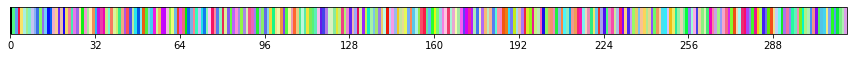

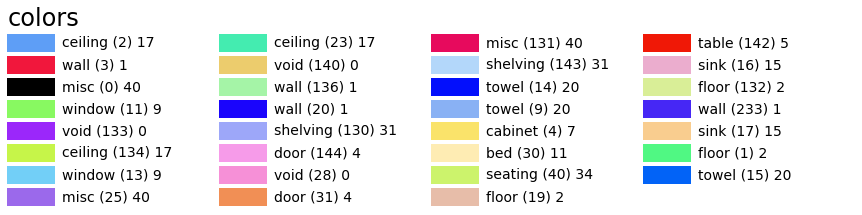

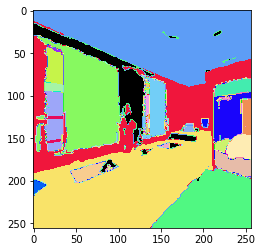

In [21]:
# Semantic sensor output with annotation, number in brackets is item number
# number after brackets is number that corresponds to each object 
# (different chairs has different number in brackets but same number after brackets)
semantic_image = semantic_base[5]

elements_in_image = []
    
for string in semantic_image:
    for el in string:
        if not(el in elements_in_image):
            elements_in_image.append(el)
            
colors = list(mcolors.CSS4_COLORS.values())
new_colors = colors
cmap = LinearSegmentedColormap.from_list('test', new_colors, N=len(new_colors))            
ccmap = matplotlib.cm.get_cmap('jet')   
new_cmap = rand_cmap(len(mapping), type='bright', first_color_black=True, last_color_black=False, verbose=True)
colorss = {}

for i,entry in enumerate(elements_in_image):
    label = index_to_title_map[mapping[entry]] + ' (' + str(entry)+ ') ' + str(mapping[entry])
    
    norm = matplotlib.colors.Normalize(vmin=-1.0, vmax=len(mapping))
    
    colorss[label] = new_cmap(norm(entry))
        
plot_colortable(colorss, 'colors')
    
plt.imshow(semantic_image, cmap=new_cmap, vmin=-1, vmax=len(mapping))
plt.show()    

In [23]:
a = {
    1:0
}

In [24]:
a

{1: 0}